**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('/Cross-Validation_Grid_Search_with_Random_Forest/Data set/cleaned_data.csv')

In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [4]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
param_grid = {'max_depth':[3,6,9,12] , 'n_estimators':[10,50,100,200] }


________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [8]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV( estimator=rf, param_grid=param_grid, verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [9]:
cv = gs.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.9s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   3.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   6.2s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   6.3s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  8.7min finished


___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [10]:
gs_df = pd.DataFrame(cv.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.409033,0.047000,0.221521,0.176746,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813388,0.824754,0.819972,0.819371,0.004660,9
1,2.319580,0.301381,0.339018,0.338744,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812122,0.820253,0.813221,0.815199,0.003602,14
2,5.525057,1.063966,2.113169,0.931120,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810997,0.819550,0.811111,0.813886,0.004005,16
3,11.068643,0.691959,3.511244,0.694460,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811419,0.819409,0.813502,0.814777,0.003384,15
4,0.969893,0.018301,0.245173,0.073524,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814653,0.823347,0.819831,0.819277,0.003571,11
5,4.786614,0.260439,0.918565,0.010598,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815919,0.824332,0.820956,0.820402,0.003457,4
6,11.679592,1.857216,2.942047,0.352075,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815216,0.824473,0.821378,0.820355,0.003848,5
7,20.922097,0.357364,4.209596,0.103697,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815638,0.824473,0.821800,0.820637,0.003700,1
8,1.259734,0.025698,0.208350,0.007716,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.812403,0.821378,0.816737,0.816839,0.003665,13
9,6.426552,0.105105,1.014390,0.022486,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.813810,0.823347,0.820816,0.819324,0.004034,10


 **Find the best hyperparameters from the cross-validation.**

In [11]:
print("Best Hyperparameters:")
print(cv.best_estimator_)

Best Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)


In [12]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.588212
11,PAY_AMT1,0.064168
0,LIMIT_BAL,0.060641
12,PAY_AMT2,0.042940
13,PAY_AMT3,0.034769
6,BILL_AMT2,0.027810
14,PAY_AMT4,0.025213
5,BILL_AMT1,0.024228
7,BILL_AMT3,0.021564
15,PAY_AMT5,0.020151


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [13]:
# Create a 5x5 grid
x,y = np.meshgrid(range(5), range(5))

In [14]:
# Set color map to `plt.cm.jet`
color_map= plt.cm.jet

Text(0, 0.5, 'Maximum depth')

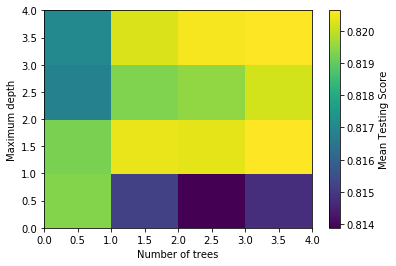

In [15]:
# Visualize pcolormesh
ax = plt.axes()
graph = ax.pcolormesh(x, y, gs_df['mean_test_score'].values.reshape((4,4)))
plt.colorbar(graph, label='Mean Testing Score')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Maximum depth')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [16]:
# Create a dataframe of the feature names and importance
new_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv.best_estimator_.feature_importances_
})

In [17]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.588212
11,PAY_AMT1,0.064168
0,LIMIT_BAL,0.060641
12,PAY_AMT2,0.042940
13,PAY_AMT3,0.034769
6,BILL_AMT2,0.027810
14,PAY_AMT4,0.025213
5,BILL_AMT1,0.024228
7,BILL_AMT3,0.021564
15,PAY_AMT5,0.020151
